In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.shape

(381109, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  0


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [7]:
data["Driving_License"] = data["Driving_License"].replace({0:"No",1:"Yes"})
data["Previously_Insured"] = data["Previously_Insured"].replace({0:"No",1:"Yes"})
data["Response"] = data["Response"].replace({0:"No",1:"Yes"})

In [8]:
data.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Driving_License,381109,2,Yes,380297
Previously_Insured,381109,2,No,206481
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413
Response,381109,2,No,334399


### Exploratory Data Analysis (EDA)

In [9]:
ax1 = data['Gender'].value_counts()
labels=ax1.index
labels

Index(['Male', 'Female'], dtype='object')

In [10]:
def pie_bar_plot(df, col, rsp):
    plt.figure(figsize=(12, 4))
    
    col_counts = df[col].value_counts().sort_index()
    
    # SUBPLOTTING 1ST: PIE CHART
    plt.subplot(1, 2, 1) 
    ax1 = col_counts
    plt.title(f"Distribution by {col}")
    colors = ['Olive','Darkkhaki','Bisque']
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%",startangle=90,colors=colors)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # SUBPLOTTING 2ND: BAR GRAPH
    plt.subplot(1, 2, 2)
    new_df = df[df[rsp] == 'Yes']
    value_1 = col_counts
    value_2 = new_df[col].value_counts().sort_index()
    ax2 = np.round((value_2 / value_1) * 100, 1).values
    plt.bar(value_2.index, value_2.values, color=colors)
    plt.title(f"Employee Opting for Insurance by {col}")
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(float(ax2[index])) + "% )", ha="center",va="bottom")

    plt.show()

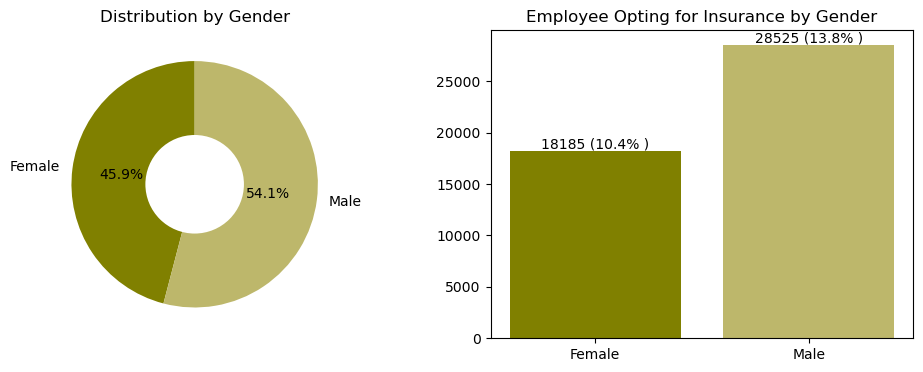

In [11]:
pie_bar_plot(data, 'Gender', 'Response')

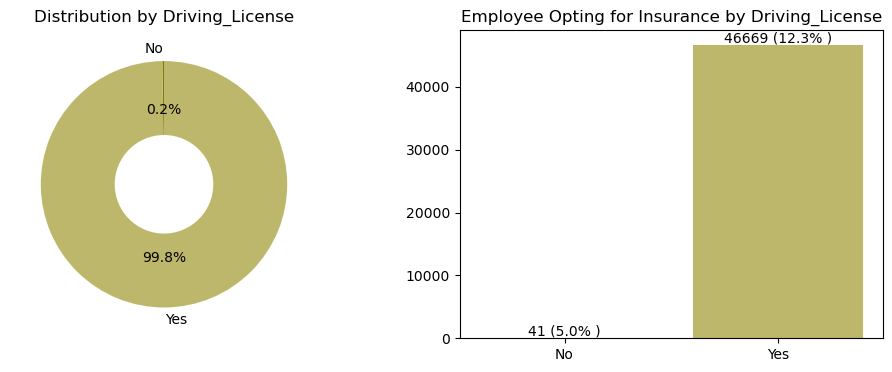

In [12]:
pie_bar_plot(data, 'Driving_License', 'Response')

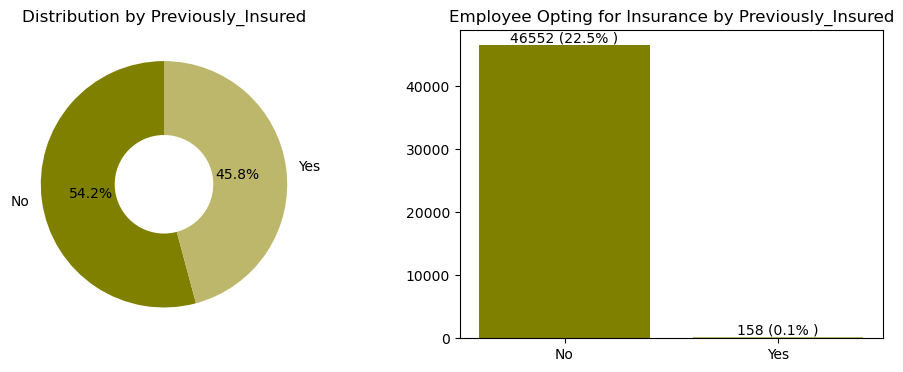

In [13]:
pie_bar_plot(data, 'Previously_Insured', 'Response')

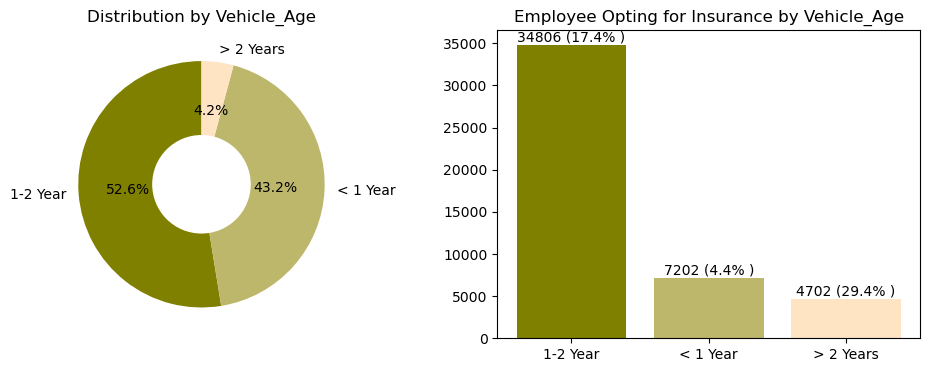

In [14]:
pie_bar_plot(data, 'Vehicle_Age', 'Response')

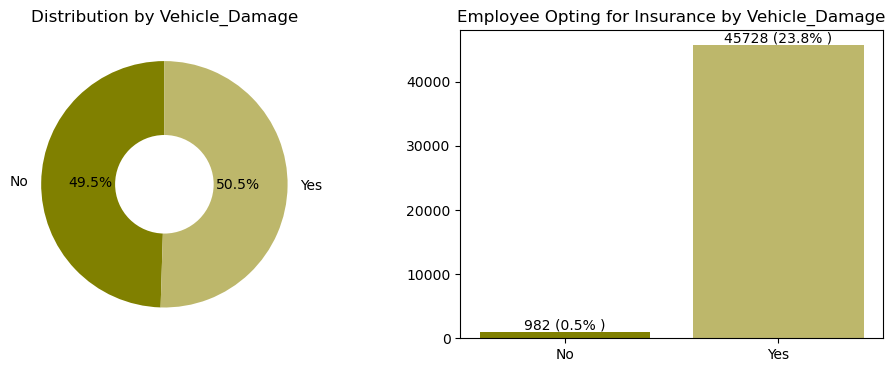

In [15]:
pie_bar_plot(data, 'Vehicle_Damage', 'Response')

In [56]:
import matplotlib.pyplot as plt

def dist_box_plot(df, col):
    plt.figure(figsize=(12, 4))
    
    # Subplotting 1: Distribution plot
    plt.subplot(1, 2, 1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Distribution by {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Subplotting 2: Box plot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col], vert=True)
    plt.title(f"Distribution by {col}")
    plt.xlabel(col)
    plt.show()

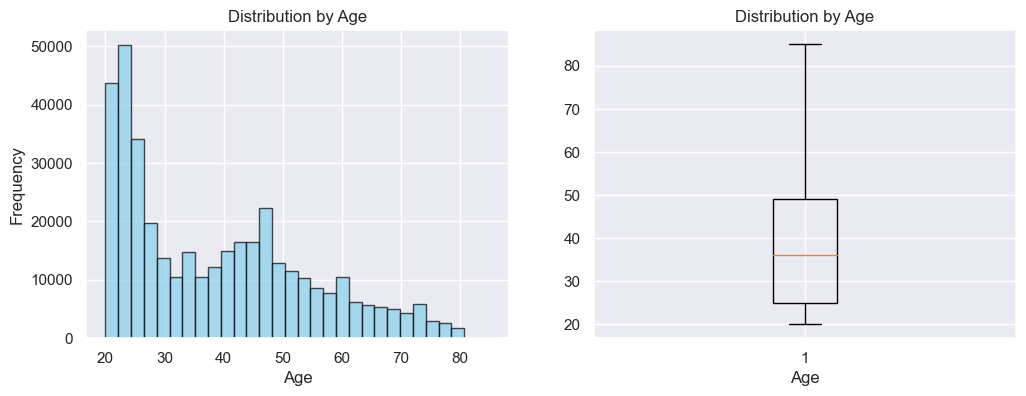

In [57]:
dist_box_plot(data, 'Age')

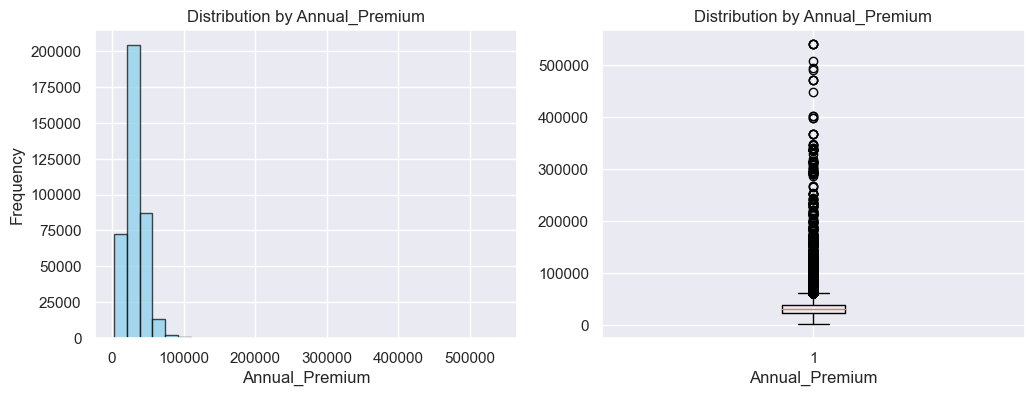

In [58]:
dist_box_plot(data, 'Annual_Premium')

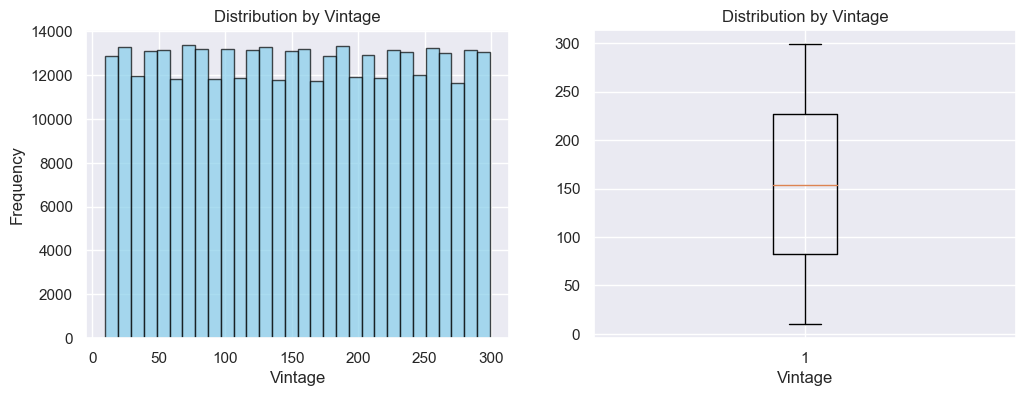

In [59]:
dist_box_plot(data, 'Vintage')

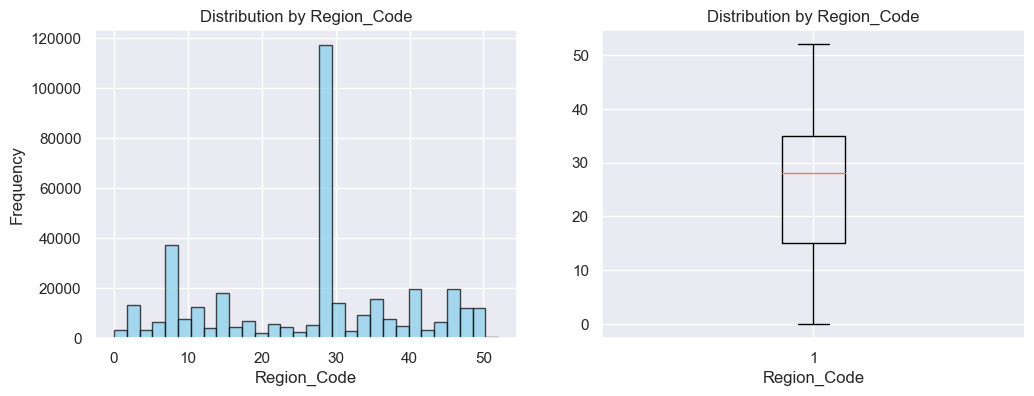

In [60]:
dist_box_plot(data, 'Region_Code')

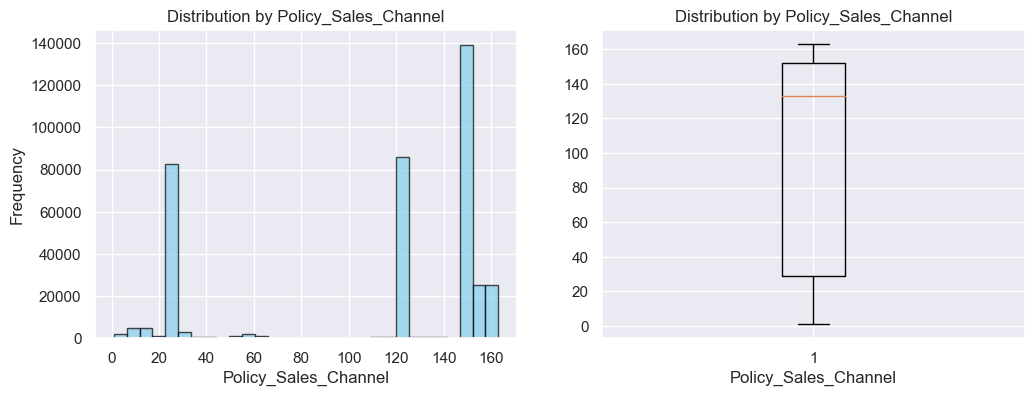

In [61]:
dist_box_plot(data, 'Policy_Sales_Channel')

In [62]:
data["Driving_License"] = data["Driving_License"].replace({"No":0,"Yes":1})
data["Previously_Insured"] = data["Previously_Insured"].replace({"No":0,"Yes":1})
data["Response"] = data["Response"].replace({"No":0,"Yes":1})
data['Gender']=data['Gender'].replace({'Female':1,'Male':0})
data['Vehicle_Damage']=data['Vehicle_Damage'].replace({'Yes':1,'No':0})
data['Vehicle_Age']=data['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [23]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


<AxesSubplot:>

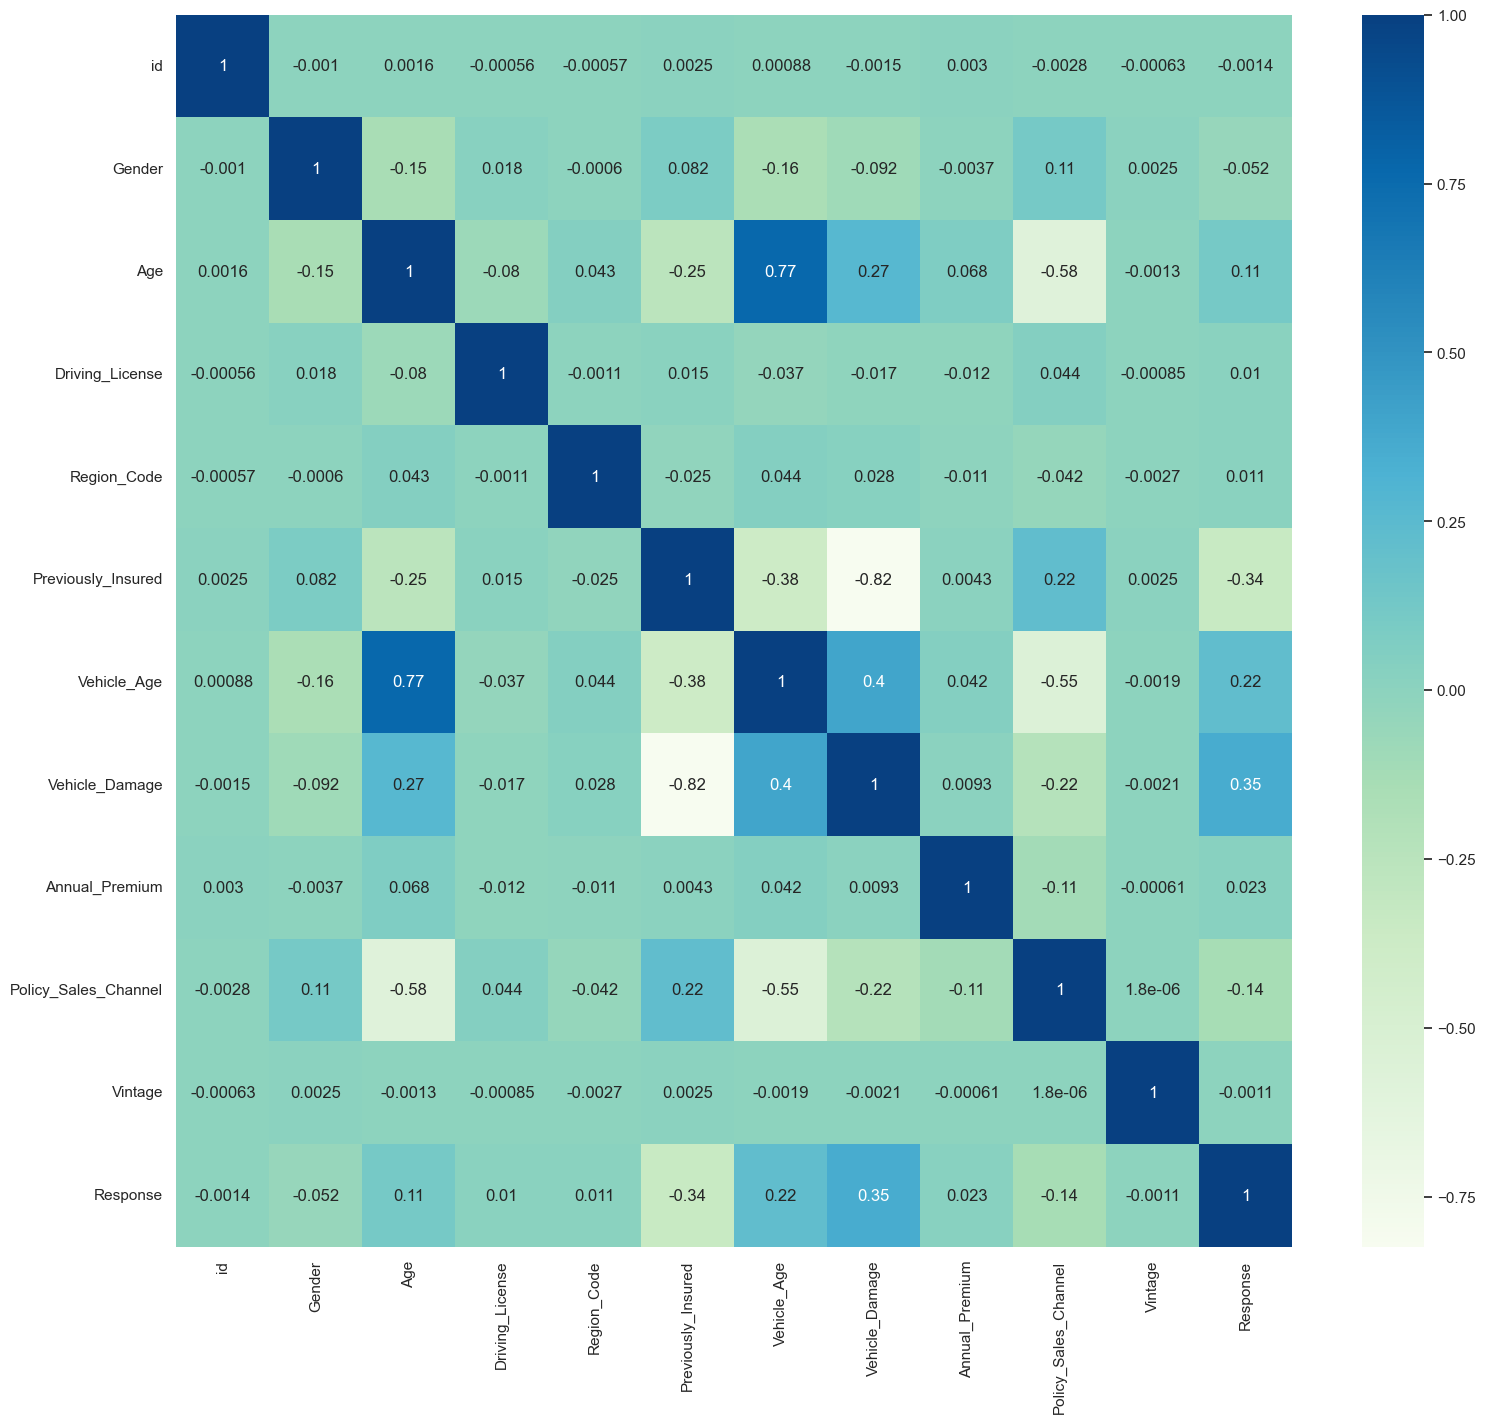

In [24]:
sns.set(rc={'figure.figsize':(18,16)})
sns.heatmap(data.corr(),annot=True,cmap='GnBu')

## Check for Imbalance in Dataset  

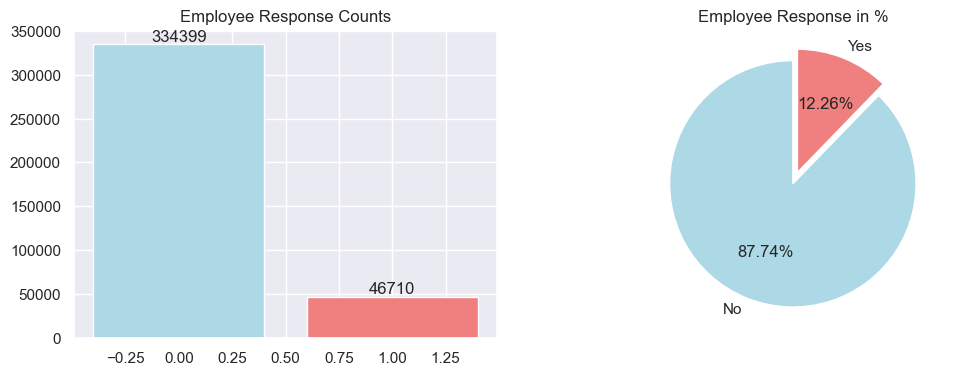

In [49]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
response_counts = data["Response"].value_counts()
plt.bar(response_counts.index, response_counts, color=['lightblue', 'lightcoral'])
plt.title("Employee Response Counts")

for i, count in enumerate(response_counts):
    plt.text(i, count, str(count), ha="center", va="bottom")

plt.subplot(1, 2, 2)
plt.pie(response_counts, labels=["No", "Yes"], autopct="%.2f%%", colors=['lightblue', 'lightcoral'], explode=[0, 0.1], startangle=90)
plt.title("Employee Response in %")

plt.show()

## Data Splitting

In [26]:
drop_column=['Response','id']
x=data.drop(columns=drop_column)
y=data[['Response']]

In [27]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,44,1,28.0,0,2,1,40454.0,26.0,217
1,0,76,1,3.0,0,1,0,33536.0,26.0,183
2,0,47,1,28.0,0,2,1,38294.0,26.0,27
3,0,21,1,11.0,1,0,0,28619.0,152.0,203
4,1,29,1,41.0,1,0,0,27496.0,152.0,39


In [28]:
y.head()

,Response
0,1
1,0
2,1
3,0
4,0


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
x_scaled = scaler.fit_transform(x)
data_scaled = scaler.fit_transform(data)

## SMOTE(Oversampling)

In [31]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_scaled,y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Response
0           334399
1            46710
dtype: int64

Response
0           334399
1           334399
dtype: int64


## Feature Scaling

In [32]:
x_scaled1 = scaler.fit_transform(x_smote)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [34]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(266776, 10) (266776, 1) (114333, 10) (114333, 1)


In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled1, y_smote, test_size=0.3, random_state=42)

In [36]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(468158, 10) (468158, 1) (200640, 10) (200640, 1)


## Model Building

In [37]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [38]:
training_score = []
testing_score = []
precision = []
recall = []
auc_score = []

training_score_1 = []
testing_score_1 = []
precision_1 = []
recall_1 = []
auc_score_1 = []

## Model Building for Original Data

In [39]:
import warnings

def model_prediction(model,x_train,y_train,x_test,y_test,hyperparameters,model_name):
    if hyperparameters:
        model.set_params(**hyperparameters)
        
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        model.fit(x_train, y_train)
        
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    
    training_score.append(a)
    testing_score.append(b)
    precision.append(c)
    recall.append(d)
    auc_score.append(e)
    
    results = pd.DataFrame({
        'Model': [model_name],
        'Train_acc': [a],
        'Test_acc': [b],
        'Precision': [c],
        'Recall': [d],
        'AUC': [e]
    })
    
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    print("\n")
    
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n3")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()
    
    return results
    
hyperparameters_rf = {'n_estimators': 200, 'max_depth': 10, 'random_state': 42}
hyperparameters_xgb = {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'random_state': 42}
hyperparameters_gb = {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'random_state': 42}
hyperparameters_ab = {'n_estimators': 200, 'learning_rate': 0.1, 'random_state': 42}
hyperparameters_lr = {'C': 1.0, 'random_state': 42}
hyperparameters_svm = {'C': 1.0, 'kernel': 'rbf', 'probability': True, 'random_state': 42}
hyperparameters_mlp = {'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42}

rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
lr_model = LogisticRegression()
svm_model = SVC()
mlp_model = MLPClassifier()

## Model Building after using SMOTE on Data

In [40]:
import warnings

def model_prediction_1(model,x_train1,y_train1,x_test1,y_test1,hyperparameters,model_name_1):
    if hyperparameters:
        model.set_params(**hyperparameters)
        
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore")
        model.fit(x_train1, y_train1)
        
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    
    a1 = accuracy_score(y_train1,x_train_pred1)*100
    b1 = accuracy_score(y_test1,x_test_pred1)*100
    c1 = precision_score(y_test1,x_test_pred1)
    d1 = recall_score(y_test1,x_test_pred1)
    e1 = roc_auc_score(y_test1, y_test_prob1)
    
    training_score_1.append(a1)
    testing_score_1.append(b1)
    precision_1.append(c1)
    recall_1.append(d1)
    auc_score_1.append(e1)
    
    results_1 = pd.DataFrame({
        'Model': [model_name_1],
        'Train_acc': [a1],
        'Test_acc': [b1],
        'Precision': [c1],
        'Recall': [d1],
        'AUC': [e1]
    })
    
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1, model.predict(x_test1)))
    print("\n")
    
    print(f"Confusion Matrix of {model} model is:")
    cm_1 = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm_1,annot=True,fmt="g",cmap="summer")
    plt.show()
    
    print("\n")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_test1, y_pred_proba1)
    auc_1 = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr_1, tpr_1, label=f"AUC = {auc_1:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()
    
    return results_1
    
hyperparameters_rf = {'n_estimators': 200, 'max_depth': 10, 'random_state': 42}
hyperparameters_xgb = {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'random_state': 42}
hyperparameters_gb = {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.8, 'random_state': 42}
hyperparameters_ab = {'n_estimators': 200, 'learning_rate': 0.1, 'random_state': 42}
hyperparameters_lr = {'C': 1.0, 'random_state': 42}
hyperparameters_svm = {'C': 1.0, 'kernel': 'rbf', 'probability': True, 'random_state': 42}
hyperparameters_mlp = {'hidden_layer_sizes': (100,), 'max_iter': 1000, 'random_state': 42}

rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
gb_model = GradientBoostingClassifier()
ab_model = AdaBoostClassifier()
lr_model = LogisticRegression()
svm_model = SVC()
mlp_model = MLPClassifier()

## Logistic Regression


						RESULTS FROM ORIGINAL DATA


Classification Report of LogisticRegression(random_state=42) model is:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.52      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.70      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



Confusion Matrix of LogisticRegression(random_state=42) model is:


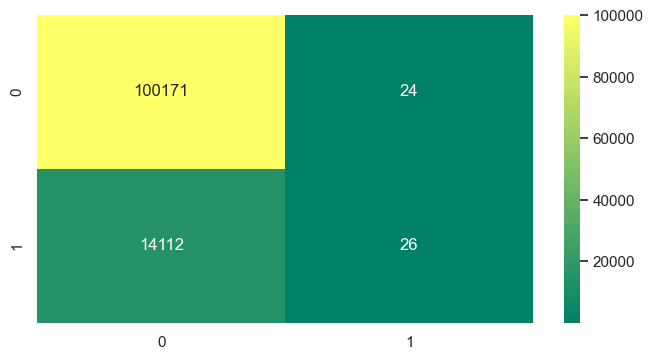


3
ROC - AUC Curve of LogisticRegression(random_state=42) model is:


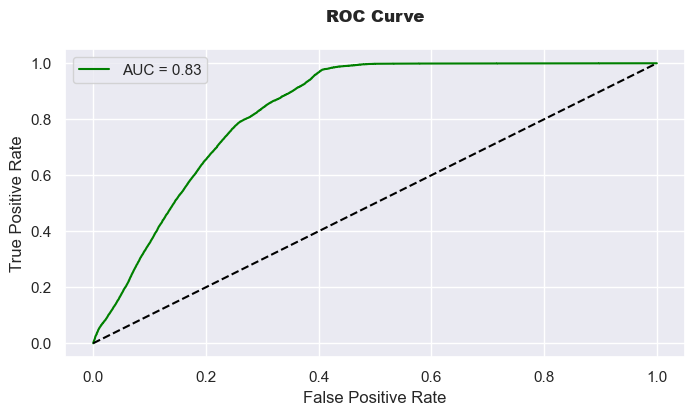



						RESULTS AFTER USING SMOTE ON DATA


Classification Report of LogisticRegression(random_state=42) model is:
              precision    recall  f1-score   support

           0       0.96      0.60      0.74    100136
           1       0.71      0.98      0.82    100504

    accuracy                           0.79    200640
   macro avg       0.84      0.79      0.78    200640
weighted avg       0.83      0.79      0.78    200640



Confusion Matrix of LogisticRegression(random_state=42) model is:


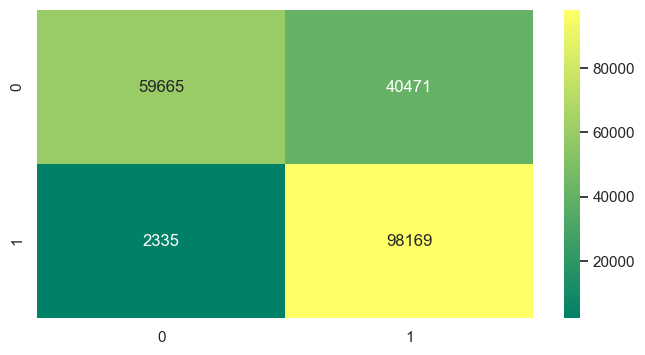



ROC - AUC Curve of LogisticRegression(random_state=42) model is:


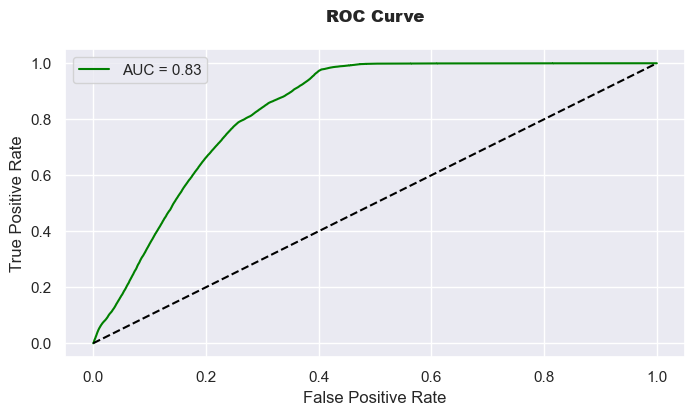


						COMBINED RESULTS




,Model,Train_acc,Test_acc,Precision,Recall,AUC
1,MODEL,87.775137,87.636116,0.520000,0.001839,0.834305
2,SMOTE_MODEL,78.318217,78.665271,0.708086,0.976767,0.834762


In [41]:
print("\n\t\t\t\t\t\t\033[1m\033[91mRESULTS FROM ORIGINAL DATA\033[0m\n\n")
results_1 = model_prediction(lr_model, x_train, y_train, x_test, y_test, hyperparameters_lr,'MODEL')

print("\n\n\t\t\t\t\t\t\033[1m\033[91mRESULTS AFTER USING SMOTE ON DATA\033[0m\n\n")
results_2 = model_prediction_1(lr_model, x_train1, y_train1, x_test1, y_test1, hyperparameters_lr,'SMOTE_MODEL')

combined_results = pd.concat([results_1, results_2], ignore_index=True)
combined_results.index = combined_results.index + 1
print("\n\t\t\t\t\t\t\033[1m\033[91mCOMBINED RESULTS\033[0m\n\n")
combined_results

## Random Forest


						RESULTS FROM ORIGINAL DATA


Classification Report of RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) model is:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.00      0.00      0.00     14138

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333



Confusion Matrix of RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) model is:


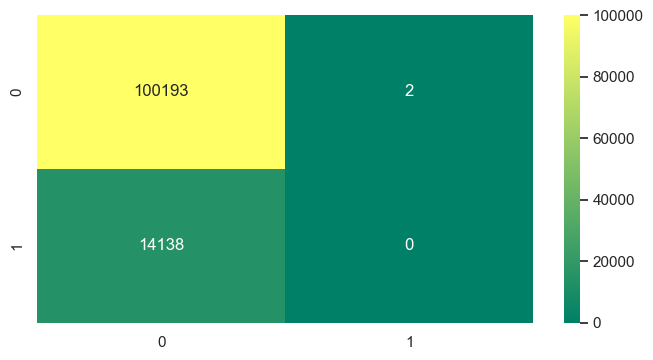


3
ROC - AUC Curve of RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) model is:


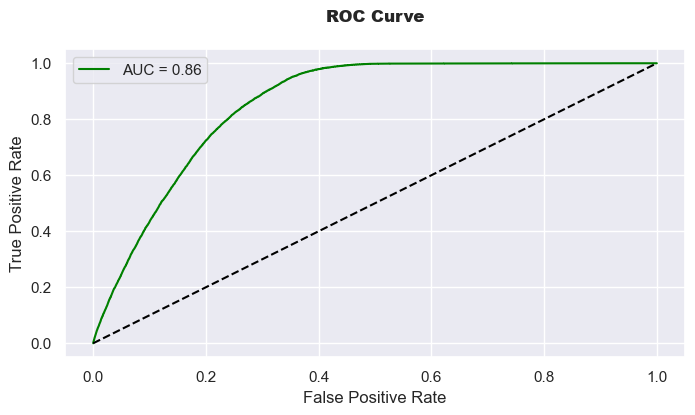



						RESULTS AFTER USING SMOTE ON DATA


Classification Report of RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) model is:
              precision    recall  f1-score   support

           0       0.95      0.68      0.79    100136
           1       0.75      0.96      0.85    100504

    accuracy                           0.82    200640
   macro avg       0.85      0.82      0.82    200640
weighted avg       0.85      0.82      0.82    200640



Confusion Matrix of RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) model is:


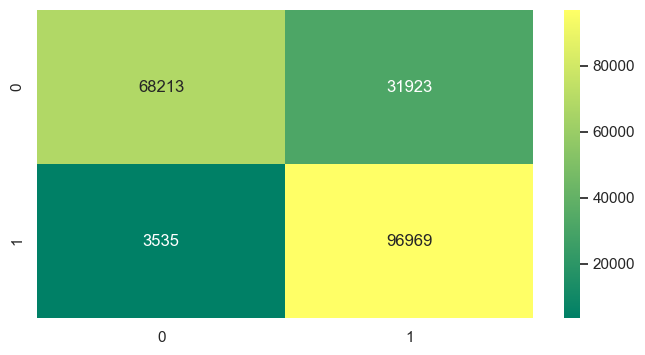



ROC - AUC Curve of RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42) model is:


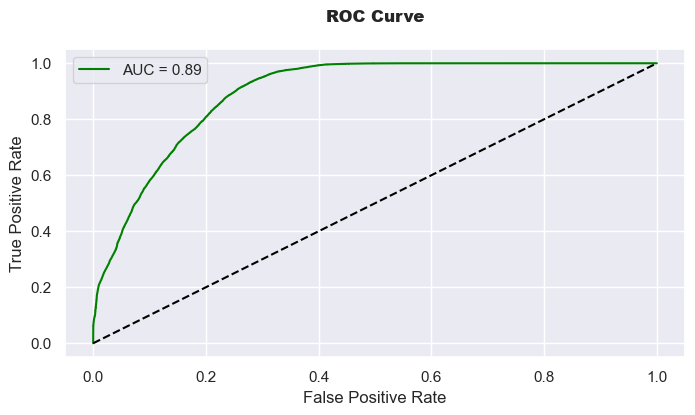


						COMBINED RESULTS




,Model,Train_acc,Test_acc,Precision,Recall,AUC
1,MODEL,87.796878,87.632617,0.000000,0.000000,0.857237
2,SMOTE_MODEL,82.239116,82.327552,0.752328,0.964827,0.894634


In [42]:
print("\n\t\t\t\t\t\t\033[1m\033[91mRESULTS FROM ORIGINAL DATA\033[0m\n\n")
results_1 = model_prediction(rf_model, x_train, y_train, x_test, y_test, hyperparameters_rf,'MODEL')

print("\n\n\t\t\t\t\t\t\033[1m\033[91mRESULTS AFTER USING SMOTE ON DATA\033[0m\n\n")
results_2 = model_prediction_1(rf_model, x_train1, y_train1, x_test1, y_test1, hyperparameters_rf,'SMOTE_MODEL')

combined_results = pd.concat([results_1, results_2], ignore_index=True)
combined_results.index = combined_results.index + 1
print("\n\t\t\t\t\t\t\033[1m\033[91mCOMBINED RESULTS\033[0m\n\n")
combined_results

## XGBOOST


						RESULTS FROM ORIGINAL DATA


Classification Report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...) model is:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.63      0.00      0.00     14138

    accuracy       

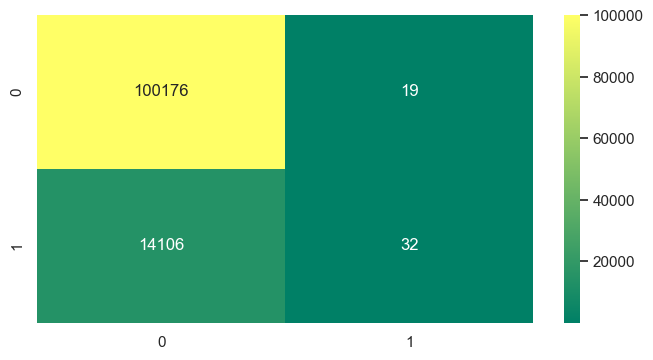


3
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...) model is:


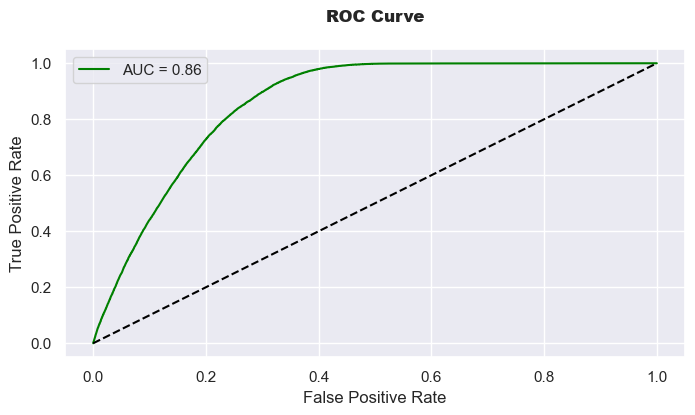



						RESULTS AFTER USING SMOTE ON DATA


Classification Report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...) model is:
              precision    recall  f1-score   support

           0       0.94      0.74      0.83    100136
           1       0.79      0.95      0.86    100504

    accurac

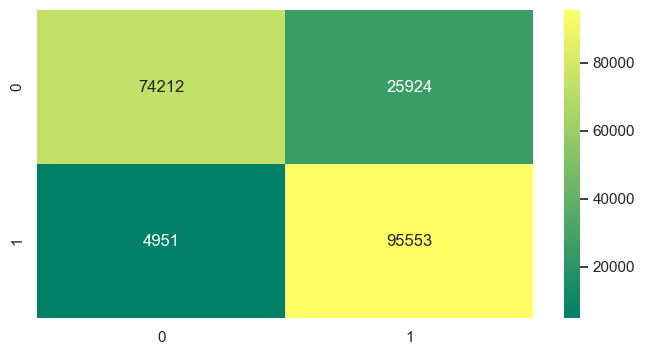



ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...) model is:


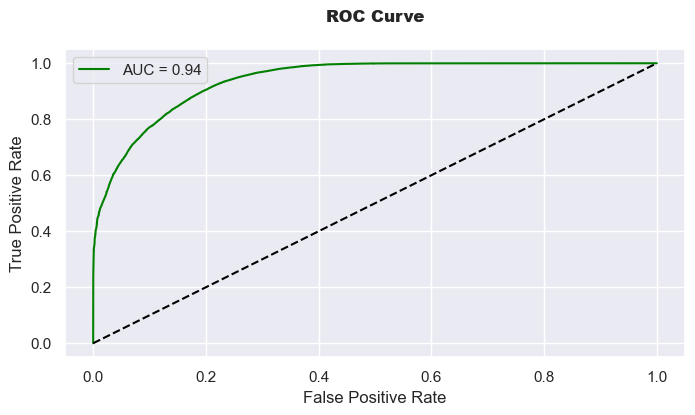


						COMBINED RESULTS




,Model,Train_acc,Test_acc,Precision,Recall,AUC
1,MODEL,87.808499,87.645737,0.627451,0.002263,0.859052
2,SMOTE_MODEL,84.376428,84.611742,0.786593,0.950738,0.939201


In [43]:
print("\n\t\t\t\t\t\t\033[1m\033[91mRESULTS FROM ORIGINAL DATA\033[0m\n\n")
results_1 = model_prediction(xgb_model, x_train, y_train, x_test, y_test, hyperparameters_xgb,'MODEL')

print("\n\n\t\t\t\t\t\t\033[1m\033[91mRESULTS AFTER USING SMOTE ON DATA\033[0m\n\n")
results_2 = model_prediction_1(xgb_model, x_train1, y_train1, x_test1, y_test1, hyperparameters_xgb,'SMOTE_MODEL')

combined_results = pd.concat([results_1, results_2], ignore_index=True)
combined_results.index = combined_results.index + 1
print("\n\t\t\t\t\t\t\033[1m\033[91mCOMBINED RESULTS\033[0m\n\n")
combined_results

## GRADIENT BOOSTING 


						RESULTS FROM ORIGINAL DATA


Classification Report of GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.8) model is:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100195
           1       0.53      0.00      0.01     14138

    accuracy                           0.88    114333
   macro avg       0.71      0.50      0.47    114333
weighted avg       0.83      0.88      0.82    114333



Confusion Matrix of GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.8) model is:


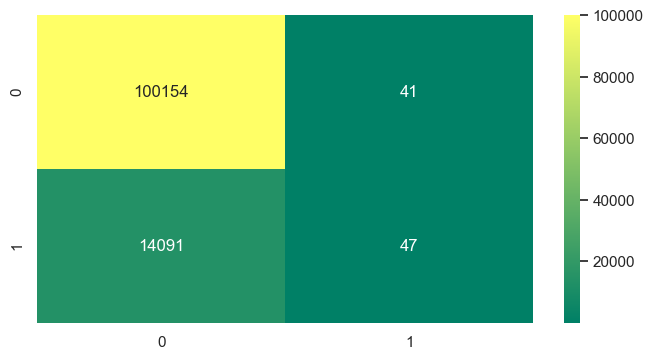


3
ROC - AUC Curve of GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.8) model is:


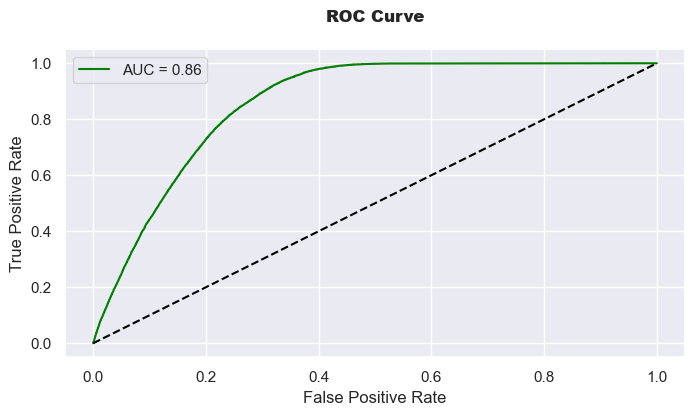



						RESULTS AFTER USING SMOTE ON DATA


Classification Report of GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.8) model is:
              precision    recall  f1-score   support

           0       0.93      0.74      0.83    100136
           1       0.79      0.95      0.86    100504

    accuracy                           0.84    200640
   macro avg       0.86      0.84      0.84    200640
weighted avg       0.86      0.84      0.84    200640



Confusion Matrix of GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.8) model is:


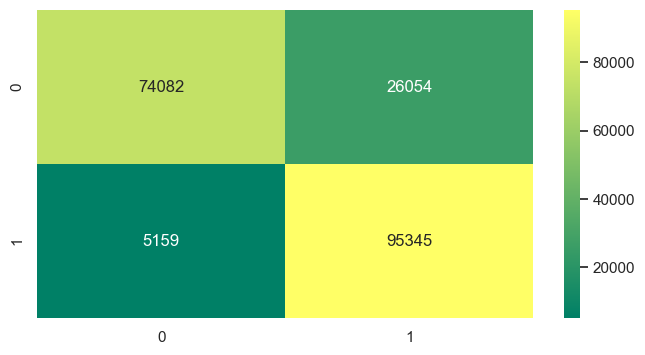



ROC - AUC Curve of GradientBoostingClassifier(n_estimators=200, random_state=42, subsample=0.8) model is:


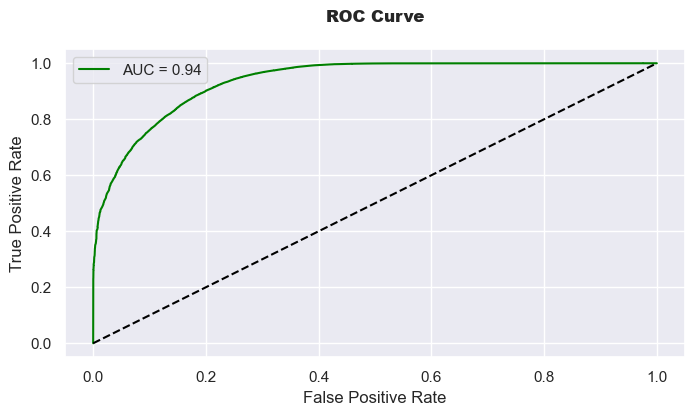


						COMBINED RESULTS




,Model,Train_acc,Test_acc,Precision,Recall,AUC
1,MODEL,87.815995,87.639614,0.534091,0.003324,0.858977
2,SMOTE_MODEL,84.181622,84.443281,0.785385,0.948669,0.936961


In [44]:
print("\n\t\t\t\t\t\t\033[1m\033[91mRESULTS FROM ORIGINAL DATA\033[0m\n\n")
results_1 = model_prediction(gb_model, x_train, y_train, x_test, y_test, hyperparameters_gb,'MODEL')

print("\n\n\t\t\t\t\t\t\033[1m\033[91mRESULTS AFTER USING SMOTE ON DATA\033[0m\n\n")
results_2 = model_prediction_1(gb_model, x_train1, y_train1, x_test1, y_test1, hyperparameters_gb,'SMOTE_MODEL')

combined_results = pd.concat([results_1, results_2], ignore_index=True)
combined_results.index = combined_results.index + 1
print("\n\t\t\t\t\t\t\033[1m\033[91mCOMBINED RESULTS\033[0m\n\n")
combined_results

## COMPARISON

In [45]:
models = ["Logistic Regression","Random Forest","XGBoost","Gradient Boost"]

In [46]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score_1,
                   "Testing Score":testing_score_1,
                  "Precision": precision_1,
                  "Recall": recall_1,
                  "AUC Score": auc_score_1})
df

,Algorithms,Training Score,Testing Score,Precision,Recall,AUC Score
0,Logistic Regression,78.318217,78.665271,0.708086,0.976767,0.834762
1,Random Forest,82.239116,82.327552,0.752328,0.964827,0.894634
2,XGBoost,84.376428,84.611742,0.786593,0.950738,0.939201
3,Gradient Boost,84.181622,84.443281,0.785385,0.948669,0.936961
